# 주제 : 글로벌을 타겟으로 한 한국 유튜브 트렌드
## Q. 영문으로 작성된 제목의 영상 조회수가 한글명으로 작성된 영상의 조회수보다 높은가? 

In [1]:
# 비교대상
# 제목에 영어를 5단어 이상 사용한 영상 추출
# 제목에 한국어만 사용한(=영어를 전혀 사용하지 않은) 영상 추출 -- 이거 구현방법 고민

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_yt = pd.read_csv("./data/KR_youtube_trending_data.csv")
df_yt.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [4]:
# 필요한 컬럼 (채널명, 채널id, 영상제목, 조회수)

column_names = ['channelTitle', 'channelId', 'title', 'view_count']
df_yt_lst = df_yt[column_names]
df_yt_lst.head()

,channelTitle,channelId,title,view_count
0,보겸 BK,UCu9BCtGIEr73LXZsKmoujKw,안녕하세요 보겸입니다,5947503
1,총몇명,UCRuSxVu4iqTK5kCh90ntAgA,부락토스의 계획 [총몇명 프리퀄],963384
2,양팡 YangPang,UCMVC92EOs9yDJG5JS-CMesQ,평생 반성하면서 살겠습니다.,2950885
3,꽈뚜룹 Quaddurup,UCkQCwnkQfgSuPTTnw_Y7v7w,안녕하세요 꽈뚜룹입니다.,1743374
4,JYP Entertainment,UCaO6TYtlC8U5ttz62hTrZgg,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,3433885


In [5]:
# 단어 토큰화 - 영어
# 제목에 영어 단어 5개 이상 사용한 유튜버 추출
# 의미없는 단어 빼기, 명사나 동사만 남기기 (정규화 & 불용어 정제)

In [6]:
# 영어 토큰화 설치
!pip install nltk

In [7]:
# 영어 토큰화 패키지 다운로드
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# 조회수로 내림차순 정렬
df_yt_global = df_yt_lst.sort_values(by="view_count", ascending=False)
df_yt_global

,channelTitle,channelId,title,view_count
55138,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,296314174
54938,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,292502967
54729,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,289350312
54519,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,285698612
54284,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,282265069
...,...,...,...,...
24599,YouTube Korea,UCOH52Yqq4-rdLvpt2Unsqsw,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,0
25512,YouTube Korea,UCOH52Yqq4-rdLvpt2Unsqsw,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,0
48130,GoogleDoodles,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,0
47461,GoogleDoodles,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,0


In [9]:
# 제목(title) 중복 제거 
# 위에서 'view_count' 기준으로 내림차순 정렬했으므로 keep=first 해서 
# - 중복값 중 조회수 높은 것 남겨둠

drop_col = ['title']
yt_global = df_yt_global.drop_duplicates(drop_col, keep='first')
yt = yt_global.reset_index(drop=True)
yt.head()

,channelTitle,channelId,title,view_count
0,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,296314174
1,Big Hit Labels,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Dynamite' Official MV,262319276
2,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844
3,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,LISA - 'LALISA' M/V,192376395
4,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248


In [10]:
# title_refined 라는 컬럼명을 새롭게 만들어
# - 제목에서 영어만 추출한 결과값 넣음

yt_glb_title = yt['title'].str.replace("[^a-zA-Z\s]", "")
yt['title_refined'] = yt_glb_title
yt.head()

<ipython-input-10-1b896e3f5a3c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  yt_glb_title = yt['title'].str.replace("[^a-zA-Z\s]", "")


,channelTitle,channelId,title,view_count,title_refined
0,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,296314174,BTS Butter Official MV
1,Big Hit Labels,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Dynamite' Official MV,262319276,BTS Dynamite Official MV
2,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,BTS Permission to Dance Official MV
3,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,LISA - 'LALISA' M/V,192376395,LISA LALISA MV
4,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,BLACKPINK Ice Cream with Selena Gomez MV


In [11]:
# title_refined 를 공백을 기준으로 split 해서 길이를 잼
# 즉, 단어 수가 나오게 해서 title_length 라는 새로운 컬럼으로 정의

import pandas as pd
import nltk

yt['title_length'] = yt.apply(lambda row: len(row['title_refined'].split()), axis=1)
yt.head()

,channelTitle,channelId,title,view_count,title_refined,title_length
0,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,296314174,BTS Butter Official MV,4
1,Big Hit Labels,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Dynamite' Official MV,262319276,BTS Dynamite Official MV,4
2,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,BTS Permission to Dance Official MV,6
3,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,LISA - 'LALISA' M/V,192376395,LISA LALISA MV,3
4,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,BLACKPINK Ice Cream with Selena Gomez MV,7


In [12]:
# title_length가 단어의 개수이므로 원래 의도대로
# - 5개 이상인 값만 추출

title_mask = yt['title_length'] >= 5
global_youtube = yt[title_mask]
global_youtube.head()

,channelTitle,channelId,title,view_count,title_refined,title_length
2,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,BTS Permission to Dance Official MV,6
4,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,BLACKPINK Ice Cream with Selena Gomez MV,7
5,Big Hit Labels,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,BTS Life Goes On Official MV,6
7,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,ROSÉ - 'On The Ground' M/V,117461115,ROS On The Ground MV,5
8,AdeleVEVO,UComP_epzeKzvBX156r6pm1Q,Adele - Easy On Me (Official Video),114925848,Adele Easy On Me Official Video,6


In [13]:
# 제목에 영어 단어 5개 이상 포함한 자료들의 데이터 프레임에 
# - '글로벌 기준' 컬럼 만들어서 ok 데이터 삽입

global_youtube['글로벌 기준'] = "ok"
global_youtube.head()

<ipython-input-13-45c2401c57d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_youtube['글로벌 기준'] = "ok"


,channelTitle,channelId,title,view_count,title_refined,title_length,글로벌 기준
2,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,BTS Permission to Dance Official MV,6,ok
4,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,BLACKPINK Ice Cream with Selena Gomez MV,7,ok
5,Big Hit Labels,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Life Goes On' Official MV,161912058,BTS Life Goes On Official MV,6,ok
7,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,ROSÉ - 'On The Ground' M/V,117461115,ROS On The Ground MV,5,ok
8,AdeleVEVO,UComP_epzeKzvBX156r6pm1Q,Adele - Easy On Me (Official Video),114925848,Adele Easy On Me Official Video,6,ok


In [14]:
# 기존 데이터에, 제목에 영어 단어 5개 이상 들어간 값들을 모아놓은 데이터 프레임인 
# - global_youtube의 글로벌 기준 컬럼을 붙여서 모든 youtube 데이터와 비교 가능하게 함

compare_all = pd.concat([yt, global_youtube['글로벌 기준']], axis=1)
compare_all.head()

,channelTitle,channelId,title,view_count,title_refined,title_length,글로벌 기준
0,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,296314174,BTS Butter Official MV,4,NaN
1,Big Hit Labels,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Dynamite' Official MV,262319276,BTS Dynamite Official MV,4,NaN
2,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,BTS Permission to Dance Official MV,6,ok
3,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,LISA - 'LALISA' M/V,192376395,LISA LALISA MV,3,NaN
4,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,BLACKPINK Ice Cream with Selena Gomez MV,7,ok


In [42]:
# 글로벌 기준 충족 여부로 나누어 시각화 하기 위해
# 글로벌 기준 컬럼의 NaN 값에 no 데이터 삽입

compare_all['글로벌 기준'] = compare_all['글로벌 기준'].fillna('no')
compare_all.head()

,channelTitle,channelId,title,view_count,title_refined,title_length,글로벌 기준
0,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Butter' Official MV,296314174,BTS Butter Official MV,4,no
1,Big Hit Labels,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Dynamite' Official MV,262319276,BTS Dynamite Official MV,4,no
2,HYBE LABELS,UC3IZKseVpdzPSBaWxBxundA,BTS (방탄소년단) 'Permission to Dance' Official MV,194795844,BTS Permission to Dance Official MV,6,ok
3,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,LISA - 'LALISA' M/V,192376395,LISA LALISA MV,3,no
4,BLACKPINK,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248,BLACKPINK Ice Cream with Selena Gomez MV,7,ok


In [15]:
# 위 자료를 가지고 어떻게 시각화를 해야할까??
# 글로벌 기준으로 나누어서 nan 값들의 평균 조회수(총 조회수 / 총 채널 개수) 
# - vs. ok 값들의 평균 조회수(총 조회수 / 총 채널 개수) 

# 아니면
# view_count 와 title_length의 상관관계를 봐도 될 듯
# 전에 공유한 블로그의 한 canvas에 9개의 그래프를 그려 상관관계 분석한 것처럼
# 왜냐하면 우리는 view_count와 title_length 동일한 두 컬럼만 필요하기 때문

In [54]:
# 한글 글씨 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [63]:
# 최종적으로 완성된 데이터 프레임인 compare_all에서 
# - 시각화에 필요한 view_count와 title_length를 추출

yt_glb_fin = compare_all.loc[:, ["view_count", "title_length"]]
yt_glb_fin.head()

,view_count,title_length
0,296314174,4
1,262319276,4
2,194795844,6
3,192376395,3
4,184778248,7


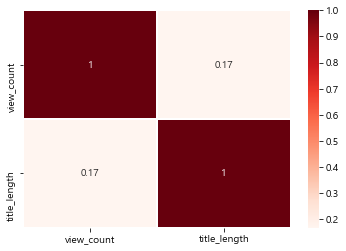

In [62]:
# 전체 자료(compare_all)의 view_count와 title_length 간 상관관계 히트맵 표현
# 즉, 제목에 영어 단어 개수 많을수록 조회수가 많은지에 관한 상관관계 표현

sns.heatmap(yt_glb_fin.corr(), annot=True, cmap="Reds", linewidths=1)
plt.show()

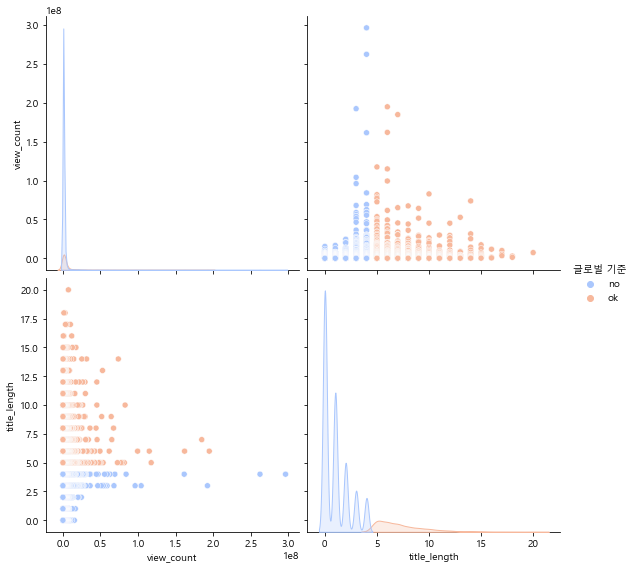

In [60]:
# 더 자세히 보기 위해 pairplot 사용
# 제목에 영어 단어 5개 이상 포함 시 글로벌 기준 충족 o => ok에 해당 = 분홍색
# 제목에 영어 단어 5개 미만 포함 시 글로벌 기준 충족 x => no에 해당 = 하늘색

all_materials = compare_all.loc[:,['view_count', 'title_length','글로벌 기준']]
sns.pairplot(all_materials, hue='글로벌 기준', palette='coolwarm', height=4)
plt.show()

# - 분석 결과 -

### 글로벌을 타겟으로 하기 위해 상대적으로 제목에 영어를 많이 사용한 유튜버가 
### 그렇지 않은 유튜버 보다 조회수가 많다는 가설은 옳지 않다.
#### ( 제목에 영어를 썼다는 것의 기준 : 5개 이상 )

## < heatmap 그래프 >

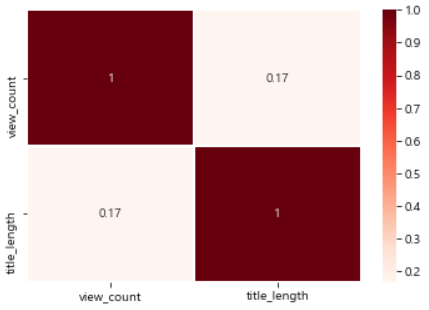

- 조회수(view_count)와 제목에 포함된 영어 단어 개수(title_length)의 상관관계가 0.17 이므로 상관관계가 전혀 없다는 결론을 내릴 수 있다.

## < pairplot 그래프 >

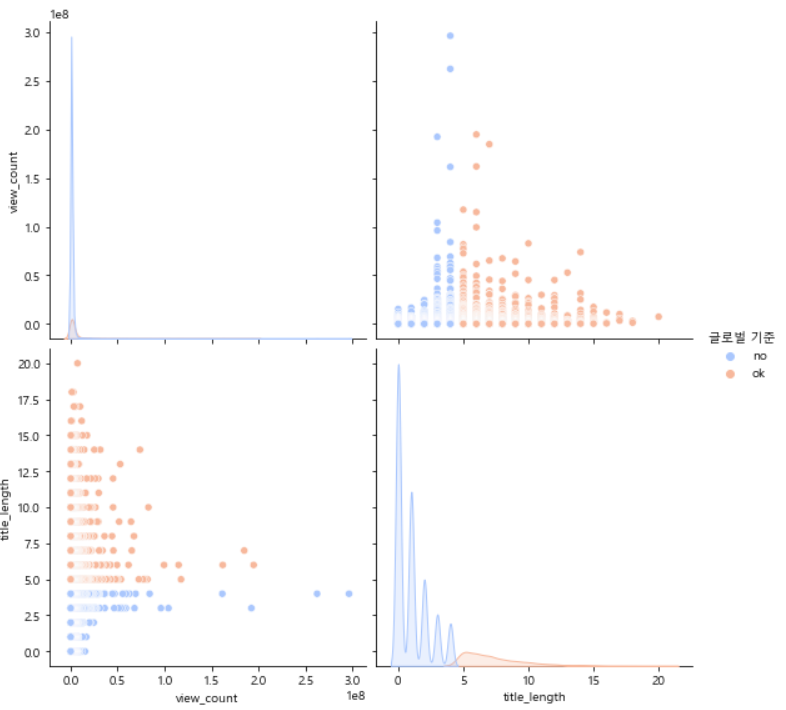

- 제목에 포함된 영어 단어 개수(title_length)가 5개 미만이면 글로벌 기준 no -> 하늘색
- 제목에 포함된 영어 단어 개수(title_length)가 5개 이상이면 글로벌 기준 ok -> 분홍색

- 제목에 포함된 영어 단어 개수가 상대적으로 많은 분홍색 점들이 그렇지 않은 하늘색 점들보다 항상 높은 조회수를 기록하는 것은 아니다.
- 특히, 하늘색 점들이 월등히 우세한 조회수를 기록하는 경우가 존재한다.
    - 아마도, 최종 데이터 프레임(compare_all)에서 높은 조회수를 기록했지만 제목에 영어 단어 5개 이상 포함하지 않은 인덱스 0, 1, 3에 해당하는 bts, blackpink 채널에 대한 데이터인 듯하다. 